In [2]:
import pandas as pd 
import numpy as np 
from zipfile import ZipFile
from collections import Counter
import ast
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
with ZipFile('data/movies_recom.zip') as zip_object:   
    with zip_object.open('movies_metadata.csv') as file_object: 
        df = pd.read_csv(file_object)
df.columns.values
df

C:\Users\sasti\AppData\Local\Temp\ipykernel_13516\3778772555.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_object)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [4]:
drop_list = ['homepage','belongs_to_collection','original_title','spoken_languages','production_countries','poster_path','production_companies','tagline']
poster_path = df['poster_path']
production_companies = df['production_companies']
df = df.drop(drop_list , axis = 1)


In [5]:
df.isna().sum()

adult                  0
budget                 0
genres                 0
id                     0
imdb_id               17
original_language     11
overview             954
popularity             5
release_date          87
revenue                6
runtime              263
status                87
title                  6
video                  6
vote_average           6
vote_count             6
dtype: int64

In [6]:
df = df.dropna(subset=['imdb_id','original_language','popularity','title','video','vote_average','vote_count'])
df.isna().sum()

adult                  0
budget                 0
genres                 0
id                     0
imdb_id                0
original_language      0
overview             951
popularity             0
release_date          81
revenue                0
runtime              255
status                81
title                  0
video                  0
vote_average           0
vote_count             0
dtype: int64

In [7]:
df['adult'].value_counts().sort_index() # shows if its a +18 movie

adult
False    45423
True         9
Name: count, dtype: int64

In [ ]:
df['budget'].value_counts().sort_index()
# there is a lot of movies with no budgets mentioned 
# we could seperate them into high_budget/low_budget/unknown_budget
def movie_budget_classification(budget): 
    value = int(budget)
    return 
# df['budget'].value_counts().sort_index().head(20).plot.bar()
df['budget'].value_counts().sort_index()

# too much movies with unknown budgets
# so maybe going to use it as a tie breaker

budget
0           36544
1              25
10             10
100             6
1000            3
            ...  
9900000         2
99000000        1
994000          1
996519          1
998000          1
Name: count, Length: 1223, dtype: int64

In [9]:
# this cell is going to be organizing the genres
df['genres'].value_counts().sort_values(ascending=False)

def get_genres(data): 
    # getting the first 2 genres
    genres = re.findall(r'\'name\': \'([a-zA-Z]*)\'',data)
    genres1 = 'None'
    genres2 = 'None'
    if(len(genres) > 1): 
        genres1 = genres[0]
        genres2 = genres[1]
    elif(len(genres) == 1): 
        genres1 = genres[0]
    return pd.Series([genres1,genres2])

df[['genres1','genres2']] = df['genres'].apply(get_genres)
df

,adult,budget,genres,id,imdb_id,original_language,overview,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,genres1,genres2
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,False,7.7,5415.0,Animation,Comedy
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Jumanji,False,6.9,2413.0,Adventure,Fantasy
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Grumpier Old Men,False,6.5,92.0,Romance,Comedy
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,False,6.1,34.0,Comedy,Drama
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,False,5.7,173.0,Comedy,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,Rising and falling between a man and woman.,0.072051,NaN,0.0,90.0,Released,Subdue,False,4.0,1.0,Drama,Family
45462,False,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Released,Century of Birthing,False,9.0,3.0,Drama,None
45463,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,Released,Betrayal,False,3.8,6.0,Action,Drama
45464,False,0,[],227506,tt0008536,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,Released,Satan Triumphant,False,0.0,0.0,None,None


In [10]:
df['genres1'].value_counts().sort_index(ascending=False)

genres1
Western          458
War              381
Thriller        1759
Romance         1223
None            2650
Mystery          568
Music            492
Horror          2701
History          284
Foreign          118
Fantasy          728
Family           546
Drama          12157
Documentary     3427
Crime           1707
Comedy          8907
Animation       1155
Adventure       1556
Action          4615
Name: count, dtype: int64

In [11]:
df.drop(['imdb_id','id'],axis = 1,inplace=True)
df

,adult,budget,genres,original_language,overview,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,genres1,genres2
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,False,7.7,5415.0,Animation,Comedy
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Jumanji,False,6.9,2413.0,Adventure,Fantasy
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Grumpier Old Men,False,6.5,92.0,Romance,Comedy
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,False,6.1,34.0,Comedy,Drama
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,False,5.7,173.0,Comedy,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",fa,Rising and falling between a man and woman.,0.072051,NaN,0.0,90.0,Released,Subdue,False,4.0,1.0,Drama,Family
45462,False,0,"[{'id': 18, 'name': 'Drama'}]",tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Released,Century of Birthing,False,9.0,3.0,Drama,None
45463,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,Released,Betrayal,False,3.8,6.0,Action,Drama
45464,False,0,[],en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,Released,Satan Triumphant,False,0.0,0.0,None,None


In [12]:
def get_year(data): 
    if(data != 'nan'): 
        return int(data.split('-')[0])
    else:
        return 2000
    
df['year'] = df['release_date'].apply(str).apply(get_year)
df = df[df['year'] > 1950]

In [13]:
df['year'].value_counts().sort_values(ascending=False)

year
2014    1974
2015    1904
2013    1889
2012    1722
2011    1666
        ... 
1951     196
1952     194
1954     191
2018       5
2020       1
Name: count, Length: 69, dtype: int64

In [14]:
df.drop('revenue',axis=1)

,adult,budget,genres,original_language,overview,popularity,release_date,runtime,status,title,video,vote_average,vote_count,genres1,genres2,year
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,81.0,Released,Toy Story,False,7.7,5415.0,Animation,Comedy,1995
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,104.0,Released,Jumanji,False,6.9,2413.0,Adventure,Fantasy,1995
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,101.0,Released,Grumpier Old Men,False,6.5,92.0,Romance,Comedy,1995
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,127.0,Released,Waiting to Exhale,False,6.1,34.0,Comedy,Drama,1995
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,106.0,Released,Father of the Bride Part II,False,5.7,173.0,Comedy,None,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,104.0,Released,Robin Hood,False,5.7,26.0,Drama,Action,1991
45461,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",fa,Rising and falling between a man and woman.,0.072051,NaN,90.0,Released,Subdue,False,4.0,1.0,Drama,Family,2000
45462,False,0,"[{'id': 18, 'name': 'Drama'}]",tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,360.0,Released,Century of Birthing,False,9.0,3.0,Drama,None,2011
45463,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,90.0,Released,Betrayal,False,3.8,6.0,Action,Drama,2003


In [15]:
df = df[df['vote_count'].apply(int) > 0]
df

,adult,budget,genres,original_language,overview,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,genres1,genres2,year
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,False,7.7,5415.0,Animation,Comedy,1995
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Jumanji,False,6.9,2413.0,Adventure,Fantasy,1995
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Grumpier Old Men,False,6.5,92.0,Romance,Comedy,1995
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,False,6.1,34.0,Comedy,Drama,1995
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,False,5.7,173.0,Comedy,None,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,False,0,"[{'id': 878, 'name': 'Science Fiction'}]",en,It's the year 3000 AD. The world's most danger...,0.661558,1995-01-01,0.0,85.0,Released,Caged Heat 3000,False,3.5,1.0,None,None,1995
45460,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,Released,Robin Hood,False,5.7,26.0,Drama,Action,1991
45461,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",fa,Rising and falling between a man and woman.,0.072051,NaN,0.0,90.0,Released,Subdue,False,4.0,1.0,Drama,Family,2000
45462,False,0,"[{'id': 18, 'name': 'Drama'}]",tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Released,Century of Birthing,False,9.0,3.0,Drama,None,2011


In [16]:
df[df['adult'].apply(lambda x : x == 'True')].head() # madness of movies in this jon bruh

,adult,budget,genres,original_language,overview,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,genres1,genres2,year
19489,True,0,"[{'id': 27, 'name': 'Horror'}]",it,A sailor takes an American businessman and his...,1.420104,1980-11-18,0.0,112.0,Released,Erotic Nights of the Living Dead,False,2.2,7.0,Horror,None,1980
28701,True,0,"[{'id': 80, 'name': 'Crime'}]",en,The FBI and Texas police make ready to storm t...,1.349745,1998-01-11,0.0,91.0,Released,Standoff,False,4.8,5.0,Crime,None,1998
32113,True,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",es,Ágata suffers from a psychological disorder wh...,6.889832,2014-02-14,0.0,72.0,Released,Diet of Sex,False,4.0,12.0,Comedy,Drama,2014
39901,True,0,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",en,Shane Ryan's sequel to the disturbing Amateur ...,0.587751,2008-05-13,0.0,0.0,Released,Amateur Porn Star Killer 2,False,6.3,8.0,Crime,Horror,2008
39902,True,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",en,Australian film about a fictional sub-par Aust...,0.417214,2009-11-17,0.0,90.0,Released,The Band,False,3.3,7.0,Comedy,Music,2009


In [17]:
df['+18'] = df['adult']
df.drop('adult' , axis = 1)

,budget,genres,original_language,overview,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,genres1,genres2,year,+18
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,False,7.7,5415.0,Animation,Comedy,1995,False
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Jumanji,False,6.9,2413.0,Adventure,Fantasy,1995,False
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Grumpier Old Men,False,6.5,92.0,Romance,Comedy,1995,False
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,False,6.1,34.0,Comedy,Drama,1995,False
4,0,"[{'id': 35, 'name': 'Comedy'}]",en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,False,5.7,173.0,Comedy,None,1995,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,0,"[{'id': 878, 'name': 'Science Fiction'}]",en,It's the year 3000 AD. The world's most danger...,0.661558,1995-01-01,0.0,85.0,Released,Caged Heat 3000,False,3.5,1.0,None,None,1995,False
45460,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,Released,Robin Hood,False,5.7,26.0,Drama,Action,1991,False
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",fa,Rising and falling between a man and woman.,0.072051,NaN,0.0,90.0,Released,Subdue,False,4.0,1.0,Drama,Family,2000,False
45462,0,"[{'id': 18, 'name': 'Drama'}]",tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Released,Century of Birthing,False,9.0,3.0,Drama,None,2011,False


In [18]:
df = df[df['status'] == 'Released']

In [19]:
df['status'].value_counts().sort_values(ascending=False)


status
Released    38787
Name: count, dtype: int64

In [20]:
drop_list = ['budget','genres','release_date']
df.drop(drop_list , axis = 1 , inplace= True)

C:\Users\sasti\AppData\Local\Temp\ipykernel_13516\479994752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(drop_list , axis = 1 , inplace= True)


In [21]:
df.drop('status',axis =1 , inplace=True)

C:\Users\sasti\AppData\Local\Temp\ipykernel_13516\4035426766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('status',axis =1 , inplace=True)


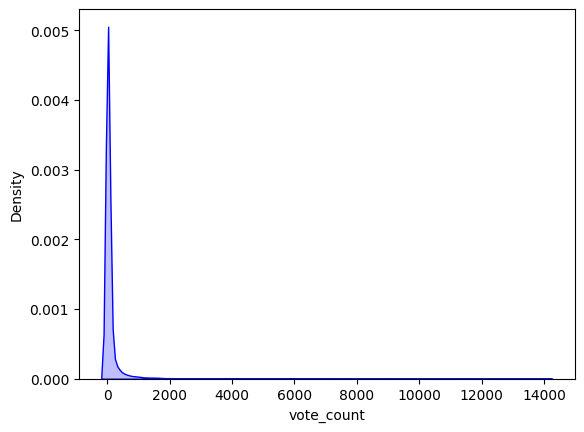

In [22]:
data = df['vote_count']
sns.kdeplot(data,fill = True , color = 'blue')
plt.show()

In [23]:
min_votes = df['vote_count'].apply(int).quantile(0.9)
mean_rating_allmovies = df['vote_average'].apply(int).mean()

def find_weighted_votes(data): 
    votes = int(data['vote_count'])
    rating = int(data['vote_average'])
    return (votes/(votes+min_votes))*rating + mean_rating_allmovies*(1 - (votes/(votes+min_votes)))

df['weighted_rating'] = df.apply(find_weighted_votes , axis = 1)   

C:\Users\sasti\AppData\Local\Temp\ipykernel_13516\2635690122.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weighted_rating'] = df.apply(find_weighted_votes , axis = 1)


In [24]:
df.drop('video',axis = 1 ,inplace = True)

C:\Users\sasti\AppData\Local\Temp\ipykernel_13516\3361399309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('video',axis = 1 ,inplace = True)


In [25]:
df

,adult,original_language,overview,popularity,revenue,runtime,title,vote_average,vote_count,genres1,genres2,year,+18,weighted_rating
0,False,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,Toy Story,7.7,5415.0,Animation,Comedy,1995,False,6.949286
1,False,en,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,104.0,Jumanji,6.9,2413.0,Adventure,Fantasy,1995,False,5.968839
2,False,en,A family wedding reignites the ancient feud be...,11.7129,0.0,101.0,Grumpier Old Men,6.5,92.0,Romance,Comedy,1995,False,5.724005
3,False,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,81452156.0,127.0,Waiting to Exhale,6.1,34.0,Comedy,Drama,1995,False,5.656576
4,False,en,Just when George Banks has recovered from his ...,8.387519,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,Comedy,None,1995,False,5.323781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,False,en,It's the year 3000 AD. The world's most danger...,0.661558,0.0,85.0,Caged Heat 3000,3.5,1.0,None,None,1995,False,5.586454
45460,False,en,"Yet another version of the classic epic, with ...",5.683753,0.0,104.0,Robin Hood,5.7,26.0,Drama,Action,1991,False,5.531260
45461,False,fa,Rising and falling between a man and woman.,0.072051,0.0,90.0,Subdue,4.0,1.0,Drama,Family,2000,False,5.591346
45462,False,tl,An artist struggles to finish his work while a...,0.178241,0.0,360.0,Century of Birthing,9.0,3.0,Drama,None,2011,False,5.648600


In [ ]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df['overview'] = df['overview'].fillna('')

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['overview'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

indices = pd.Series(df.index, index=df['title']).drop_duplicates()

def get_recommendations(title: str, n: int = 10):
    idx = indices.get(title)
    if idx is None:
        raise ValueError(f"Title '{title}' not found in dataset!")

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n+1]
    movie_indices = [i for i, _ in sim_scores]
    return df['title'].iloc[movie_indices].tolist()


C:\Users\sasti\AppData\Local\Temp\ipykernel_13516\592774779.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overview'] = df['overview'].fillna('')


In [28]:


sample_title = df['title'].iloc[0]  # first movie in the dataset
print(f"Recommendations for '{sample_title}':")
for title in get_recommendations(sample_title, 5):
    print(" •", title)


Recommendations for 'Toy Story':
 • Toy Story 3
 • Toy Story 2
 • The 40 Year Old Virgin
 • Small Fry
 • Hot Splash
